<a href="https://colab.research.google.com/github/kamilfedio/bank_marketing_predict/blob/main/bank_marketing_subscription_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Uploading dataset

In [ ]:
!pip install opendatasets --upgrade --quiet

In [ ]:
! mkdir ~/.kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! cp /content/drive/MyDrive/collab/kaggle/kaggle.json ~/.kaggle

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download henriqueyamahata/bank-marketing

100% 393k/393k [00:00<00:00, 1.04MB/s]
100% 393k/393k [00:00<00:00, 1.04MB/s]


In [ ]:
! unzip /content/bank-marketing.zip

Archive:  /content/bank-marketing.zip
  inflating: bank-additional-full.csv  
  inflating: bank-additional-names.txt  


### Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

### Load dataset

In [ ]:
df_csv = pd.read_csv('/content/bank-additional-full.csv', delimiter=';')
df_csv.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Copying & splitting data

In [ ]:
marketing = df_csv.copy()

In [ ]:
def convert_object_to_category(df):
    for column in df.select_dtypes(include=['object']).columns:
        if df[column].dtype == 'object':
            df[column] = df[column].astype('category')

    return df

In [ ]:
from sklearn.model_selection import train_test_split
marketing = convert_object_to_category(marketing)
marketing_train, marketing_test = train_test_split(marketing, test_size = .2, random_state = 42, stratify=marketing['y'])
marketing_train.size

691950

In [ ]:
marketing = marketing_train.copy()
marketing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32950 entries, 25611 to 10747
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             32950 non-null  int64   
 1   job             32950 non-null  category
 2   marital         32950 non-null  category
 3   education       32950 non-null  category
 4   default         32950 non-null  category
 5   housing         32950 non-null  category
 6   loan            32950 non-null  category
 7   contact         32950 non-null  category
 8   month           32950 non-null  category
 9   day_of_week     32950 non-null  category
 10  duration        32950 non-null  int64   
 11  campaign        32950 non-null  int64   
 12  pdays           32950 non-null  int64   
 13  previous        32950 non-null  int64   
 14  poutcome        32950 non-null  category
 15  emp.var.rate    32950 non-null  float64 
 16  cons.price.idx  32950 non-null  float64 
 17  cons.conf.idx

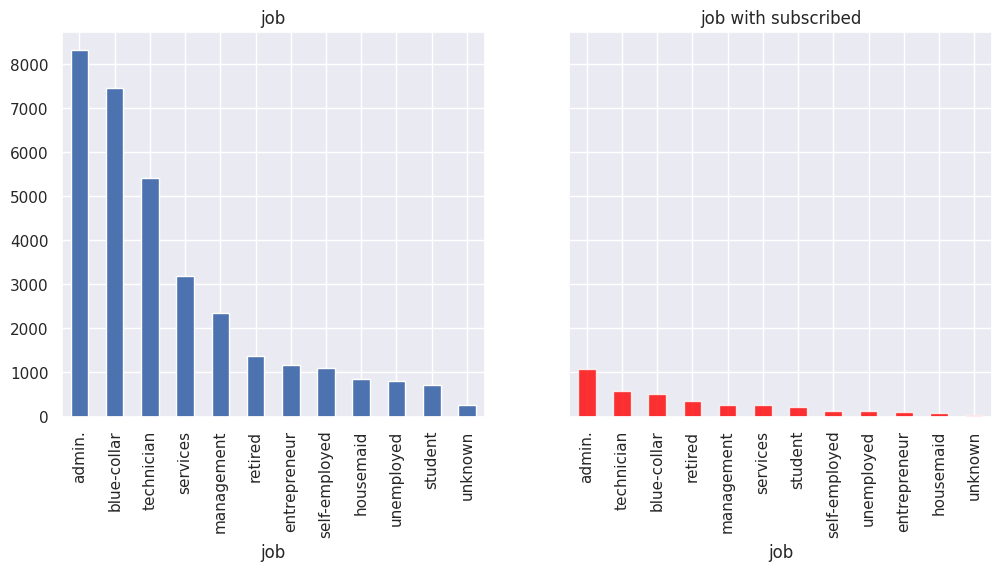

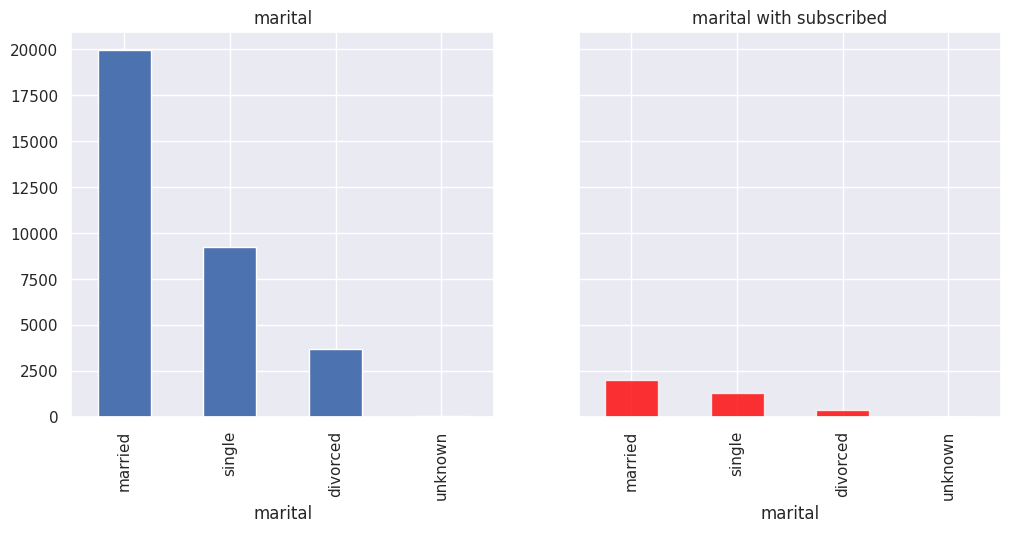

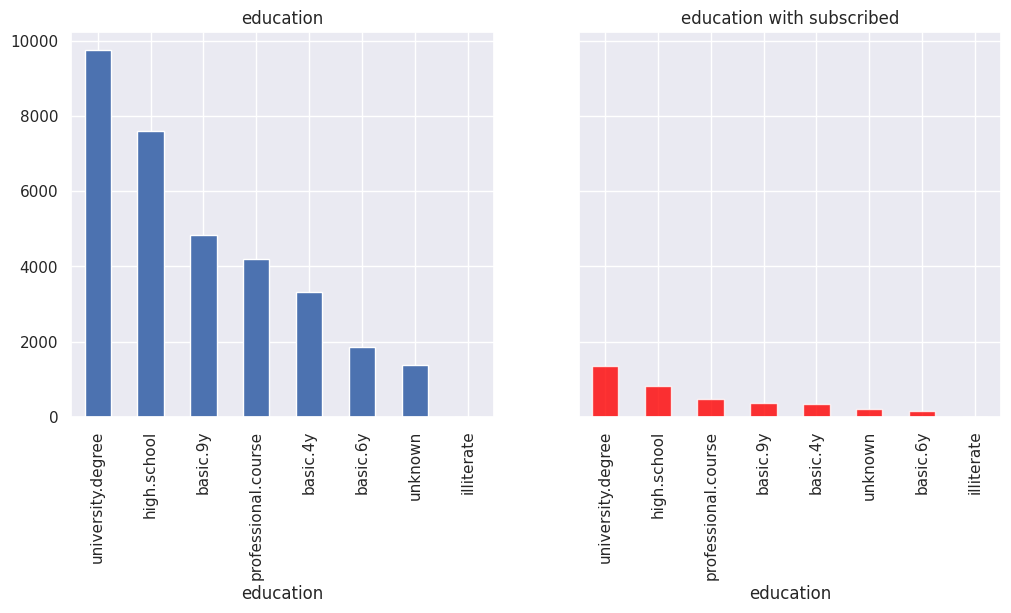

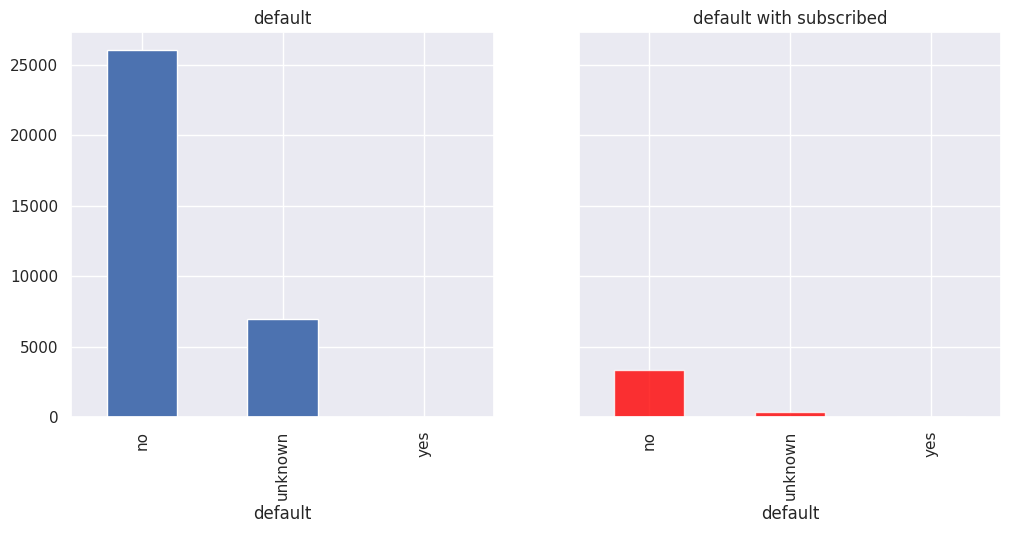

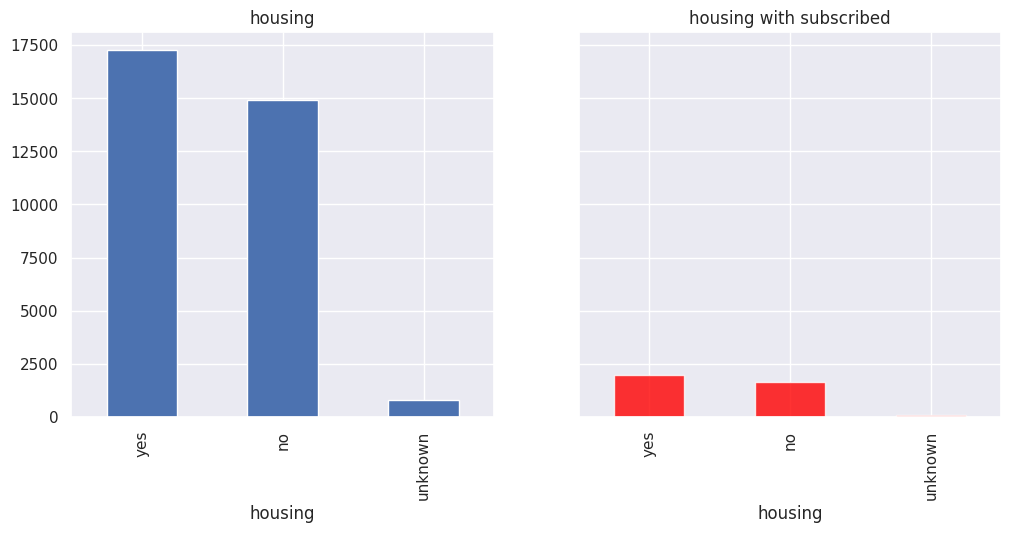

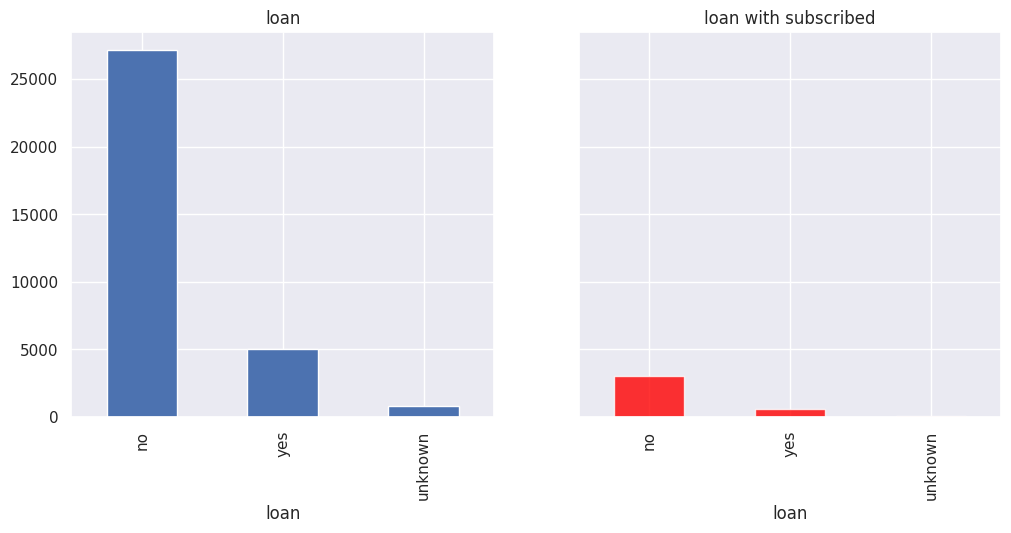

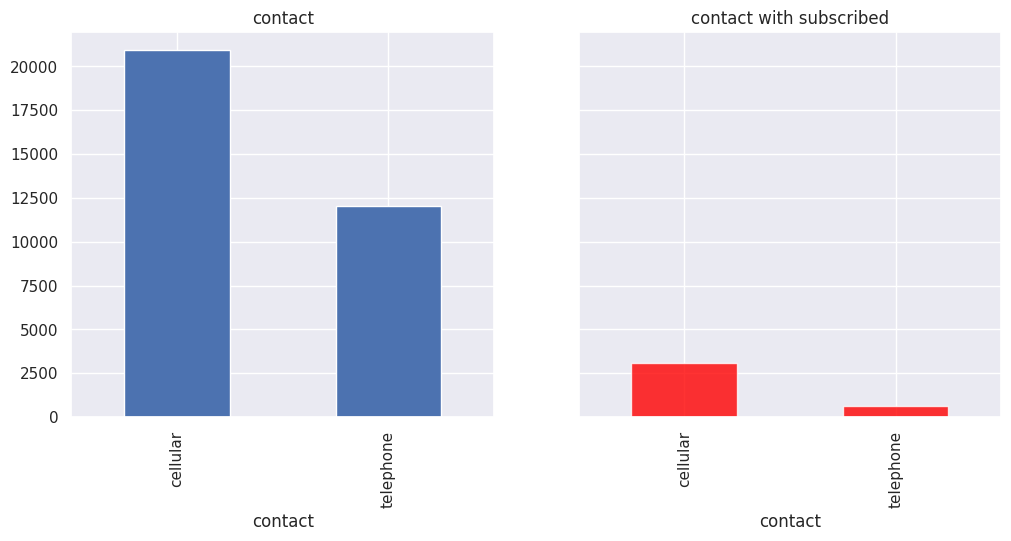

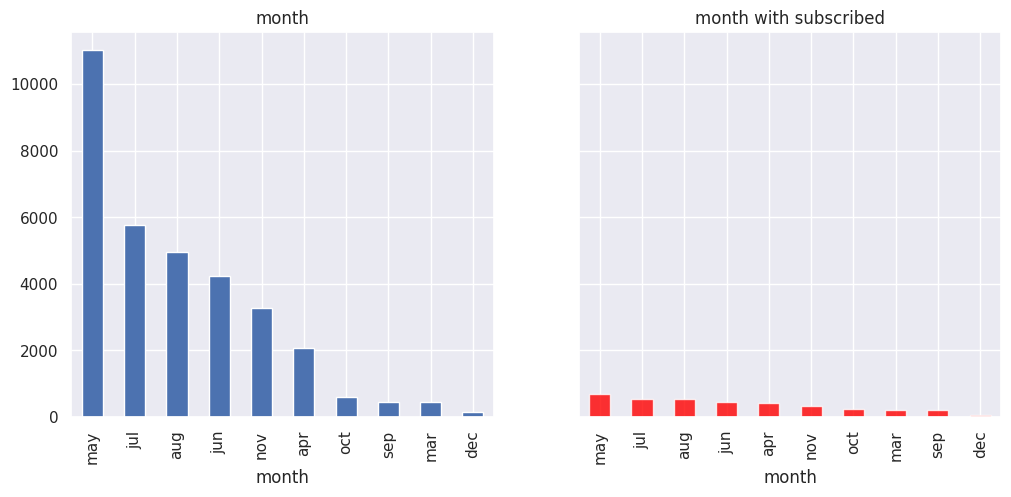

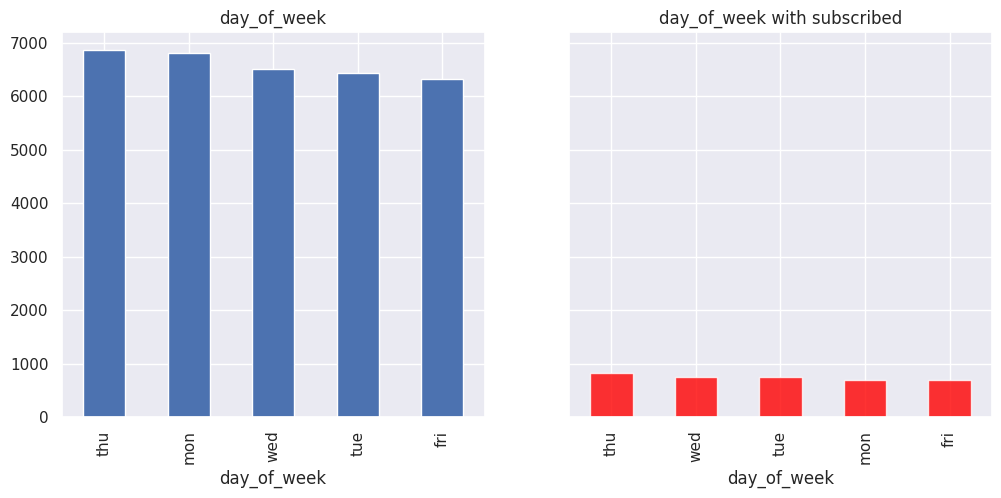

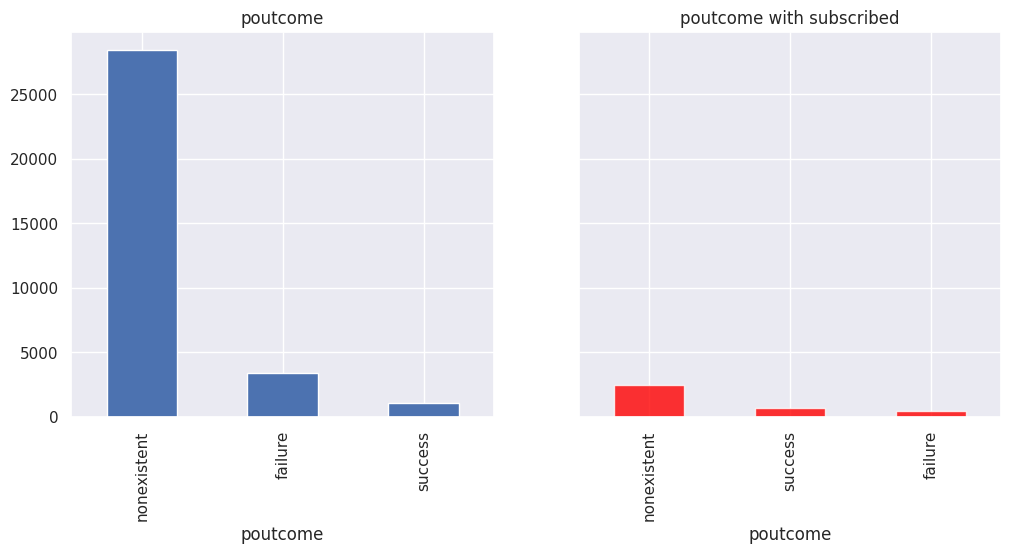

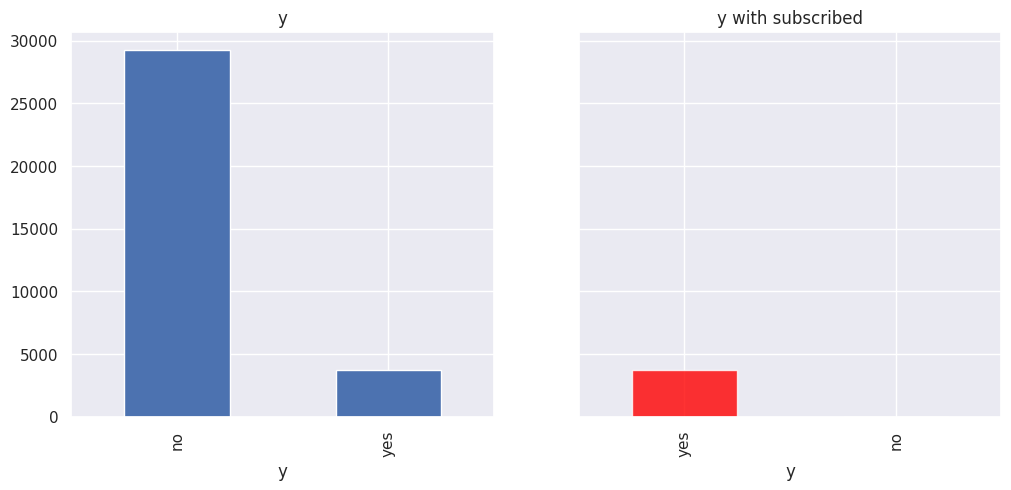

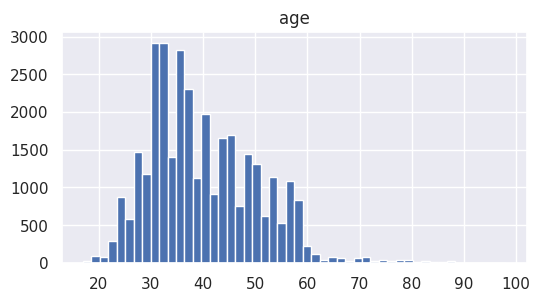

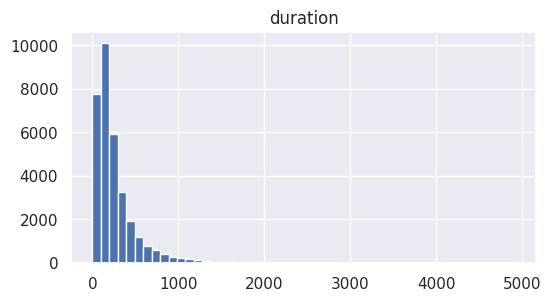

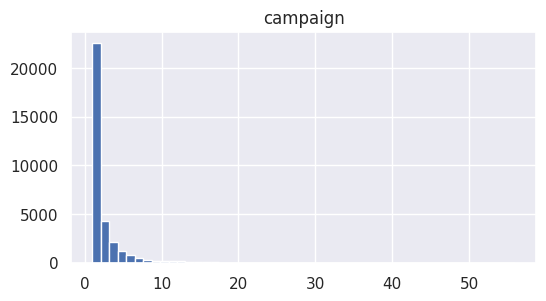

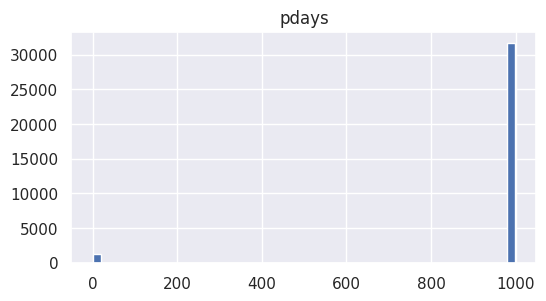

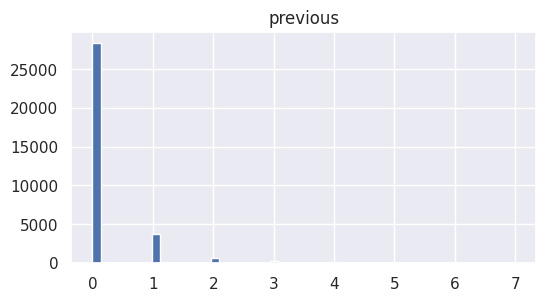

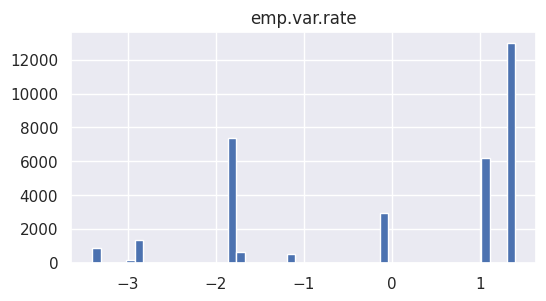

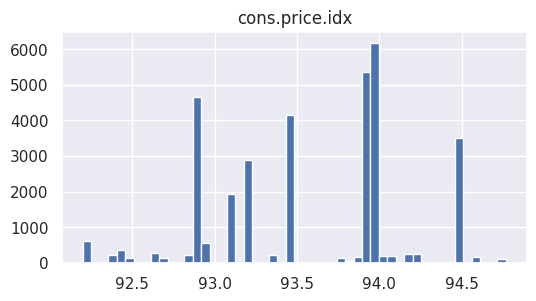

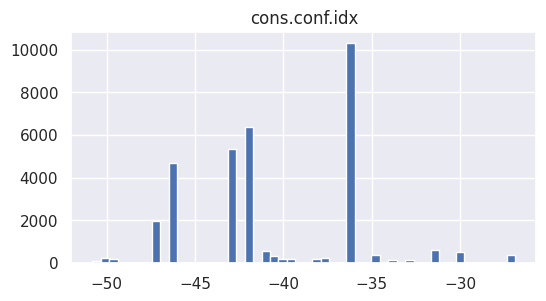

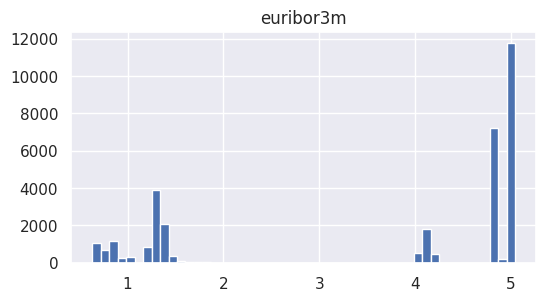

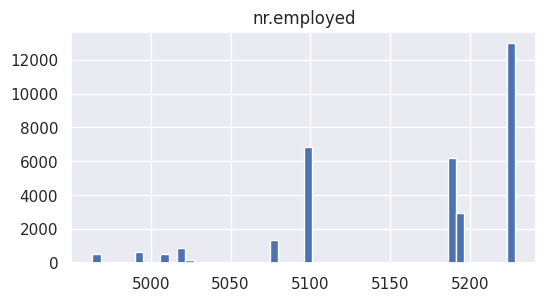

In [ ]:
numerical_cols = marketing.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = marketing.select_dtypes(include=['category']).columns

for col in categorical_cols:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5), sharey=True)

    marketing[col].value_counts().plot(kind='bar', ax=axes[0])
    axes[0].set_title(col)

    subscribed_counts = marketing.loc[marketing['y'] == 'yes', col].value_counts()
    subscribed_counts.plot(kind='bar', color='red', alpha=0.8, label='Subscribed', ax=axes[1])
    axes[1].set_title(col + ' with subscribed')

    plt.show()


for col in numerical_cols:
  plt.figure(figsize=(6,3))
  marketing[col].hist(bins=50)
  plt.title(col)
  plt.show()

In [ ]:
marketing.replace('unknown', np.nan, inplace=True)
marketing.isnull().sum() / len(marketing)

age               0.000000
job               0.008042
marital           0.001973
education         0.042398
default           0.210622
housing           0.024158
loan              0.024158
contact           0.000000
month             0.000000
day_of_week       0.000000
duration          0.000000
campaign          0.000000
pdays             0.000000
previous          0.000000
poutcome          0.000000
emp.var.rate      0.000000
cons.price.idx    0.000000
cons.conf.idx     0.000000
euribor3m         0.000000
nr.employed       0.000000
y                 0.000000
dtype: float64

#### simple preprocessing

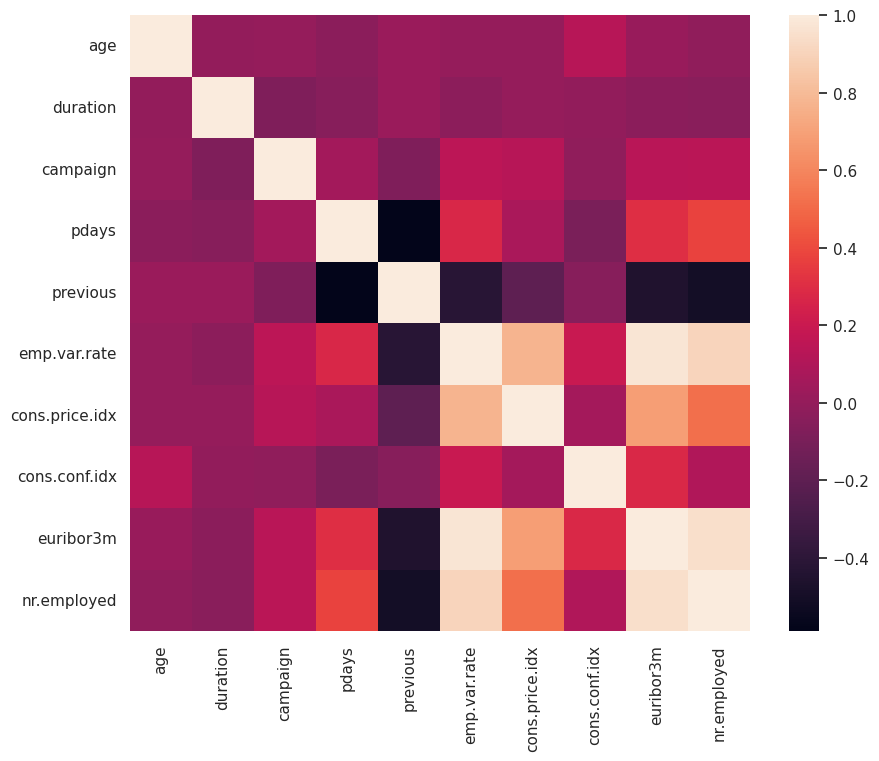

In [ ]:
corr = marketing[numerical_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr)
plt.show()

In [ ]:
corr

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.001841,0.003302,-0.032011,0.020670,0.002259,0.002287,0.126710,0.013594,-0.013729
duration,-0.001841,1.000000,-0.075663,-0.047127,0.022538,-0.027713,0.003441,-0.006424,-0.031492,-0.042358
campaign,0.003302,-0.075663,1.000000,0.053795,-0.079051,0.148954,0.126283,-0.013968,0.133033,0.141595
pdays,-0.032011,-0.047127,0.053795,1.000000,-0.589601,0.272858,0.077395,-0.095759,0.298964,0.376408
previous,0.020670,0.022538,-0.079051,-0.589601,1.000000,-0.420582,-0.200360,-0.048462,-0.455633,-0.503447
emp.var.rate,0.002259,-0.027713,0.148954,0.272858,-0.420582,1.000000,0.773923,0.195488,0.972154,0.906313
cons.price.idx,0.002287,0.003441,0.126283,0.077395,-0.200360,0.773923,1.000000,0.057918,0.686048,0.518472
cons.conf.idx,0.126710,-0.006424,-0.013968,-0.095759,-0.048462,0.195488,0.057918,1.000000,0.277257,0.100555
euribor3m,0.013594,-0.031492,0.133033,0.298964,-0.455633,0.972154,0.686048,0.277257,1.000000,0.944974
nr.employed,-0.013729,-0.042358,0.141595,0.376408,-0.503447,0.906313,0.518472,0.100555,0.944974,1.000000


### Preprocessing

In [ ]:
X_train = marketing_train.drop('y', axis=1)
y_train = marketing_train['y'].copy()
X_test = marketing_test.drop('y', axis=1)
y_test = marketing_test['y'].copy()

In [ ]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer, LabelEncoder, KBinsDiscretizer


def label_transform(X):
  encoder = LabelEncoder()
  encoder.fit(X)
  X = encoder.transform(X)
  return X


y_train = label_transform(y_train)
y_test = label_transform(y_test)

#### Custom transformers

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class DropColumns(BaseEstimator, TransformerMixin):
    def __init__(self,columns):
        self.columns=columns

    def transform(self,X,y=None):
        return X.drop(self.columns,axis=1)

    def fit(self, X, y=None):
        return self

In [ ]:
drop_pipeline = make_pipeline(
    DropColumns(['day_of_week', 'duration', 'pdays', 'nr.employed', 'default'])
)

log_pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    FunctionTransformer(np.log),
    StandardScaler()
)

num_pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
)

cat_pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore')
)

In [ ]:
preprocessing = ColumnTransformer([
    ('drop', drop_pipeline, []),
    ('log', log_pipeline, ['age', 'campaign']),
    ('num', num_pipeline, ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']),
    ('cat', cat_pipeline, ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'poutcome'])
])

### Models

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

log_reg = Pipeline([('preprocessing',preprocessing), ('model', LogisticRegression(max_iter=1500, random_state=42))])
dec_tree = Pipeline([('preprocessing',preprocessing), ('model', DecisionTreeClassifier(random_state=42))])
ran_for = Pipeline([('preprocessing',preprocessing), ('model', RandomForestClassifier(random_state=42))])

In [ ]:
log_score = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='accuracy')
dec_score = cross_val_score(dec_tree, X_train, y_train, cv=5, scoring='accuracy')
ran_score = cross_val_score(ran_for, X_train, y_train, cv=5, scoring='accuracy')
print('log:', log_score)
print('dec:', dec_score)
print('ran:', ran_score)

log: [0.9        0.90060698 0.89666161 0.89726859 0.90030349]
dec: [0.84081942 0.84248862 0.83778452 0.83672231 0.83429439]
ran: [0.88937785 0.89074355 0.89165402 0.88801214 0.88664643]


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'model__max_iter': [350, 500, 800],
     'model__C': [.7, .8, .9, 1]
     }
]
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print(f'{grid_search.best_score_}: {grid_search.best_params_}')

0.8989681335356601: {'model__C': 0.8, 'model__max_iter': 350}


In [ ]:
param_grid = [
    {'model__max_depth': [4, 5, 6],
     'model__min_samples_split': [200, 250, 300]
     }
]
grid_search = GridSearchCV(dec_tree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print(f'{grid_search.best_score_}: {grid_search.best_params_}')

0.899969650986343: {'model__max_depth': 5, 'model__min_samples_split': 250}


In [ ]:
param_grid = [
    {'model__max_depth': [7, 10, 13],
     'model__min_samples_split': [100, 150, 200],
     'model__n_estimators': [25, 50, 100,]
     }
]
grid_search = GridSearchCV(ran_for, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print(f'{grid_search.best_score_}: {grid_search.best_params_}')

0.899453717754173: {'model__max_depth': 13, 'model__min_samples_split': 150, 'model__n_estimators': 25}


### Predict and evaluate model

In [ ]:
dec_tree = make_pipeline(preprocessing, DecisionTreeClassifier(max_depth= 5, min_samples_split= 250))
dec_tree.fit(X_train, y_train)
predicts = dec_tree.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_curve, auc
acc = accuracy_score(predicts, y_test)
conf_mat = confusion_matrix(predicts, y_test)
prec = precision_score(predicts, y_test)
rec = recall_score(predicts, y_test)

print('Accuracy:', acc)
print('Precision:', prec)
print('Recall:', rec)

Accuracy: 0.9032532168001942
Precision: 0.2640086206896552
Recall: 0.6824512534818942


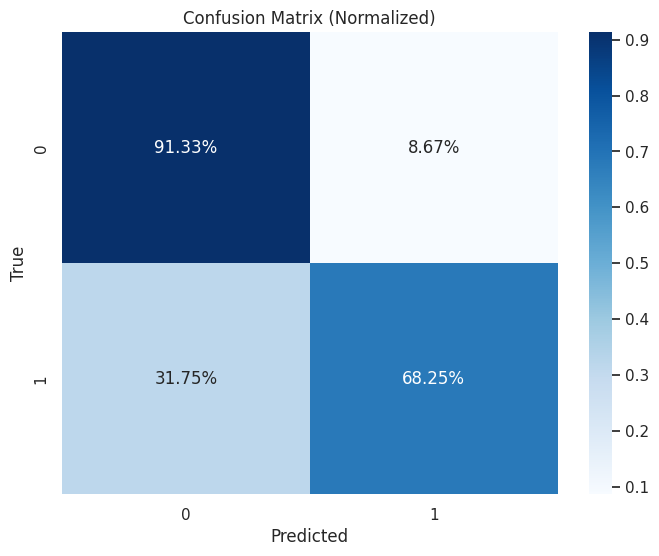

In [ ]:
conf_matrix_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_normalized, annot=True, fmt=".2%", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Normalized)")
plt.show()

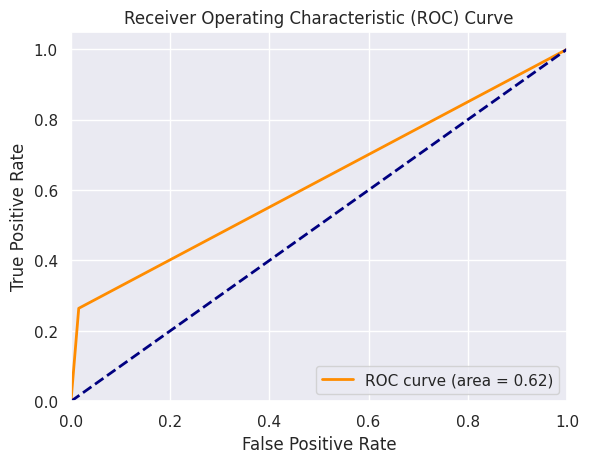

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, predicts)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()